In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ..visualization_utils
import math
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'visualization_utils'

In [ ]:
from baseline_constants import (
    ACCURACY_KEY,
    BYTES_READ_KEY,
    BYTES_WRITTEN_KEY,
    CLIENT_ID_KEY,
    LOCAL_COMPUTATIONS_KEY,
    NUM_ROUND_KEY,
    NUM_SAMPLES_KEY)

def plot_accuracy_vs_round_number(realx_axis_values, 
                                  realy_axis_values,
                                  leafx_axis_values, 
                                  leafy_axis_values, 
                                  atype, 
                                  weighted=False, figsize=(10, 8), title_fontsize=16, **kwargs):

    plt.figure(figsize=figsize)
    title_weighted = 'Weighted' if weighted else 'Unweighted'
    plt.title(atype + ' Accuracy vs Round Number (%s)' % title_weighted, fontsize=title_fontsize)
    plt.plot(realx_axis_values, realy_axis_values, label='Testbed')
    plt.plot(leafx_axis_values, leafy_axis_values, label='LEAF')
    
    plt.legend(loc='center right')

    plt.ylabel('Accuracy')
    plt.xlabel('Round Number')
    plt.savefig('combined.png')

def get_accuracy_vs_round_number(stat_metrics, weighted=False):
    if weighted:
        accuracies = stat_metrics.groupby(NUM_ROUND_KEY).apply(_weighted_mean, ACCURACY_KEY, NUM_SAMPLES_KEY)
        accuracies = accuracies.reset_index(name=ACCURACY_KEY)

    else:
        accuracies = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).mean()
        stds = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).std()

    percentile_10 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).apply(lambda x: x.quantile(0.10)) #.quantile(10)
    percentile_90 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).apply(lambda x: x.quantile(0.90)) #.quantile(90)

#     print(accuracies)
    return accuracies, percentile_10, percentile_90

def get_training_time_vs_round_number(stat_metrics):
    training_times = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).mean()
    return training_times

def _weighted_mean(df, metric_name, weight_name):
    d = df[metric_name]
    w = df[weight_name]
    
    try:
        return (w * d).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

In [341]:
flops = {}
flops["0"] = 17.249536
flops["30"] = 8.800030
flops["50"] = 4.510336
flops["70"] = 1.828590
print(flops)

def get_data_to_barplot(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

#     testbed_1k = fpath + 'metrics_stat_testbed_1k.csv' # change to None if desired
#     testbed_1k_pruned = fpath + 'metrics_stat_testbed_1k_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_pruned.csv' # change to None if desired
    
#     testbed_100k = fpath + 'metrics_stat_testbed_100k.csv' # change to None if desired
#     testbed_100k_pruned = fpath + 'metrics_stat_testbed_100k_pruned.csv' # change to None if desired
    
#     testbed_1m = fpath + 'metrics_stat_testbed_1m.csv' # change to None if desired
#     testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_pruned.csv' # change to None if desired
    
#     testbed_6m = fpath + 'metrics_stat_testbed_6m.csv' # change to None if desired
#     testbed_6m_pruned = fpath + 'metrics_stat_testbed_6m_pruned.csv' # change to None if desired
    
#     metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
#     metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)
    
    
    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

#     metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
#     metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

#     metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
#     metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)
    
#     metrics_testbed_6m= visualization_utils.load_data(testbed_6m)
#     metrics_testbed_6m_pruned = visualization_utils.load_data(testbed_6m_pruned)
    
#     metrics_testbed_1k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
#     metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
#     metrics_testbed_1k['model_params'] = '1K'
#     metrics_testbed_1k_pruned["model_params"] = '1K'
    
    
#     metrics_testbed_10k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_10k['prune_percentage'] = 'Large Model'
    metrics_testbed_10k['model_params'] = '10K'
    metrics_testbed_10k['flops'] = flops["0"]
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["model_params"] = '10K'
    metrics_testbed_10k_pruned['flops'] = flops[f"{pruning_percentage}"]
    
#     metrics_testbed_100k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
#     metrics_testbed_100k['prune_percentage'] = 'Large Model (10K, 100K, 1M, 6M)'
#     metrics_testbed_100k['model_params'] = '100K'
#     metrics_testbed_100k_pruned["prune_percentage"] = f'{pruning_percentage}% Pruned Model'
#     metrics_testbed_100k_pruned["model_params"] = '100K'
    

#     metrics_testbed_1m['prune_percentage'] = 'Large Model (10K, 100K, 1M, 6M)'
#     metrics_testbed_1m['model_params'] = '1M'
#     metrics_testbed_1m_pruned["prune_percentage"] = f'{pruning_percentage}% Pruned Model'
#     metrics_testbed_1m_pruned["model_params"] = '1M'
    
#     metrics_testbed_6m['prune_percentage'] = 'Large Model (10K, 100K, 1M, 6M)'
#     metrics_testbed_6m['model_params'] = '6M'
#     metrics_testbed_6m_pruned["prune_percentage"] = f'{pruning_percentage}% Pruned Model'
#     metrics_testbed_6m_pruned["model_params"] = '6M'
    
    
#     print(metrics_testbed_1k['total_train_time']/1000 )
    
#     metrics_testbed_1k['total_train_time'] = metrics_testbed_1k['total_train_time'].astype('float') / 1000
#     metrics_testbed_1k_pruned['total_train_time'] = metrics_testbed_1k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_10k['total_train_time'] = (metrics_testbed_10k['total_train_time'].astype('float') / 1000)/60
    metrics_testbed_10k_pruned['total_train_time'] = (metrics_testbed_10k_pruned['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_100k['total_train_time'] = (metrics_testbed_100k['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_100k_pruned['total_train_time'] = (metrics_testbed_100k_pruned['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_1m['total_train_time'] = (metrics_testbed_1m['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_1m_pruned['total_train_time'] = (metrics_testbed_1m_pruned['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_6m['total_train_time'] = (metrics_testbed_6m['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_6m_pruned['total_train_time'] = (metrics_testbed_6m_pruned['total_train_time'].astype('float') / 1000)/60

    '''
    Plot training times for slow device only
    '''
    
    
#     df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
#     df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

#     df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
#     df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

#     df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
#     df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
#     df_slow_device_6m = metrics_testbed_6m.loc[metrics_testbed_6m['is_slow'] == 1]
#     df_slow_device_6m_pruned = metrics_testbed_6m_pruned.loc[metrics_testbed_6m_pruned['is_slow'] == 1]
    
    panda_frames = []
    
#     panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
#     panda_frames.append(df_slow_device_100k_pruned)
#     panda_frames.append(df_slow_device_1m_pruned)
#     panda_frames.append(df_slow_device_6m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
#     panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
#     panda_frames.append(df_slow_device_100k)
#     panda_frames.append(df_slow_device_1m)
#     panda_frames.append(df_slow_device_6m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned



def get_data_to_barplot_slow_fast(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

#     testbed_1k = fpath + 'metrics_stat_testbed_1k.csv' # change to None if desired
#     testbed_1k_pruned = fpath + 'metrics_stat_testbed_1k_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_pruned.csv' # change to None if desired
    
#     testbed_100k = fpath + 'metrics_stat_testbed_100k.csv' # change to None if desired
#     testbed_100k_pruned = fpath + 'metrics_stat_testbed_100k_pruned.csv' # change to None if desired
    
#     testbed_1m = fpath + 'metrics_stat_testbed_1m.csv' # change to None if desired
#     testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_pruned.csv' # change to None if desired
    
#     testbed_6m = fpath + 'metrics_stat_testbed_6m.csv' # change to None if desired
#     testbed_6m_pruned = fpath + 'metrics_stat_testbed_6m_pruned.csv' # change to None if desired
    
#     testbed_10m_pruned = fpath + 'metrics_stat_testbed_10m_pruned.csv' # change to None if desired
    
#     metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
#     metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)
    
    
    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

#     metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
#     metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

#     metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
#     metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)
    
#     metrics_testbed_6m= visualization_utils.load_data(testbed_6m)
#     metrics_testbed_6m_pruned = visualization_utils.load_data(testbed_6m_pruned)
    
#     metrics_testbed_10m_pruned = visualization_utils.load_data(testbed_10m_pruned)
    
#     metrics_testbed_1k['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
#     metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
#     metrics_testbed_1k['model_params'] = '1K'
    
    
#     metrics_testbed_1k_pruned["model_params"] = '1K'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Slow Device (6M)'
    metrics_testbed_10k['model_params'] = '10K'
    
#     metrics_testbed_10k_pruned["prune_percentage"] = f'Slow Device ({pruning_percentage}% Pruned Model)'
#     metrics_testbed_10k_pruned["model_params"] = '10K'
    
#     metrics_testbed_100k['prune_percentage'] = 'Slow Device (10K, 100K, 1M, 6M)'
#     metrics_testbed_100k['model_params'] = '100K'
#     metrics_testbed_100k_pruned["prune_percentage"] = f'Slow Device ({pruning_percentage}% Pruned Model)'
#     metrics_testbed_100k_pruned["model_params"] = '100K'
    

#     metrics_testbed_1m['prune_percentage'] = 'Slow Device (10K, 100K, 1M, 6M)'
#     metrics_testbed_1m['model_params'] = '1M'
#     metrics_testbed_1m_pruned["prune_percentage"] = f'Slow Device ({pruning_percentage}% Pruned Model)'
#     metrics_testbed_1m_pruned["model_params"] = '1M'
    
#     metrics_testbed_6m['prune_percentage'] = 'Slow Device (10K, 100K, 1M, 6M)'
#     metrics_testbed_6m['model_params'] = '6M'
#     metrics_testbed_6m_pruned["prune_percentage"] = f'Slow Device ({pruning_percentage}% Pruned Model)'
#     metrics_testbed_6m_pruned["model_params"] = '6M'
    
#     metrics_testbed_10m_pruned["prune_percentage"] = f'Slow Device ({pruning_percentage}% Pruned Model)'
#     metrics_testbed_10m_pruned["model_params"] = '10M'
    
    
#     print(metrics_testbed_1k['total_train_time']/1000 )
    
#     metrics_testbed_1k['total_train_time'] = metrics_testbed_1k['total_train_time'].astype('float') / 1000
#     metrics_testbed_1k_pruned['total_train_time'] = metrics_testbed_1k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_10k['total_train_time'] = (metrics_testbed_10k['total_train_time'].astype('float') / 1000)/60
    metrics_testbed_10k_pruned['total_train_time'] = (metrics_testbed_10k_pruned['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_100k['total_train_time'] = (metrics_testbed_100k['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_100k_pruned['total_train_time'] = (metrics_testbed_100k_pruned['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_1m['total_train_time'] = (metrics_testbed_1m['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_1m_pruned['total_train_time'] = (metrics_testbed_1m_pruned['total_train_time'].astype('float') / 1000)/60
    
    
    
#     metrics_testbed_6m['total_train_time'] = (metrics_testbed_6m['total_train_time'].astype('float') / 1000)/60
#     metrics_testbed_6m_pruned['total_train_time'] = (metrics_testbed_6m_pruned['total_train_time'].astype('float') / 1000)/60
    
#     metrics_testbed_10m_pruned['total_train_time'] = (metrics_testbed_10m_pruned['total_train_time'].astype('float') / 1000)/60

    '''
    Plot training times for slow device only
    '''
    
    
#     df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
#     df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

#     df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
#     df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

#     df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
#     df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
#     df_slow_device_6m = metrics_testbed_6m.loc[metrics_testbed_6m['is_slow'] == 1]
#     df_slow_device_6m_pruned = metrics_testbed_6m_pruned.loc[metrics_testbed_6m_pruned['is_slow'] == 1]
    
#     df_slow_device_10m_pruned = metrics_testbed_10m_pruned.loc[metrics_testbed_10m_pruned['is_slow'] == 1]
    
    
#     metrics_testbed_1k['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
#     metrics_testbed_1k['model_params'] = '1K'
    
    metrics_testbed_10k['prune_percentage'] = 'Fast Device (10K, 100K, 1M, 6M)'
    metrics_testbed_10k['model_params'] = '10K'
    
#     metrics_testbed_100k['prune_percentage'] = 'Fast Device (10K, 100K, 1M, 6M)'
#     metrics_testbed_100k['model_params'] = '100K'
    
#     metrics_testbed_1m['prune_percentage'] = 'Fast Device (10K, 100K, 1M, 6M)'
#     metrics_testbed_1m['model_params'] = '1M'
    
#     metrics_testbed_6m['prune_percentage'] = 'Fast Device (10K, 100K, 1M, 6M)'
#     metrics_testbed_6m['model_params'] = '6M'
    
    
#     df_fast_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 0]
    df_fast_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 0]
#     df_fast_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 0]
#     df_fast_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 0]
#     df_fast_device_6m = metrics_testbed_6m.loc[metrics_testbed_6m['is_slow'] == 0]
    
    
    
    
    
    panda_frames = []
    
#     panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
#     panda_frames.append(df_slow_device_100k_pruned)
#     panda_frames.append(df_slow_device_1m_pruned)
#     panda_frames.append(df_slow_device_6m_pruned)
#     panda_frames.append(df_slow_device_10m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
#     panda_frames.append(df_fast_device_1k)
    panda_frames.append(df_fast_device_10k)
#     panda_frames.append(df_fast_device_100k)
#     panda_frames.append(df_fast_device_1m)
#     panda_frames.append(df_fast_device_6m)
    
#     panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
#     panda_frames.append(df_slow_device_100k)
#     panda_frames.append(df_slow_device_1m)
#     panda_frames.append(df_slow_device_6m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

{'0': 17.249536, '30': 8.80003, '50': 4.510336, '70': 1.82859}


In [342]:
# testbed_means_30, testbed_pruned_means_30 = get_data_to_barplot(30, '2021-03-30')
# testbed_means_50, testbed_pruned_means_50 = get_data_to_barplot(50, '2021-03-30')
# testbed_means_70, testbed_pruned_means_70 = get_data_to_barplot(70, '2021-03-30')

combined_pruned_frame_0, combined_frame_0 = get_data_to_barplot(0, '14-10-2021')
combined_pruned_frame_30, combined_frame_30 = get_data_to_barplot(30, '14-10-2021')
combined_pruned_frame_50, combined_frame_50 = get_data_to_barplot(50, '14-10-2021')
combined_pruned_frame_70, combined_frames_70 = get_data_to_barplot(70, '14-10-2021')

panda_frames = []


panda_frames.append(combined_frame_0)
panda_frames.append(combined_pruned_frame_30)
panda_frames.append(combined_pruned_frame_50)
panda_frames.append(combined_pruned_frame_70)

combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)

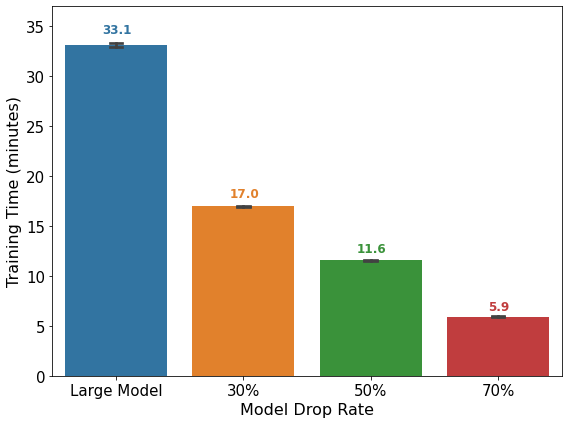

In [404]:
fs=(8,6)
fig, ax = plt.subplots(figsize=fs)
font_size= 16

bar_plot = sns.barplot(x="prune_percentage",y="total_train_time",data=combined_frame,capsize=0.1)
# bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          
# bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

# bar_plot.set_title('Training Time (Slow Client)', fontsize=font_size)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_ylabel('Training Time (minutes)', fontsize=font_size)
ax.set_xlabel('Model Drop Rate', fontsize=font_size)
ax.set_ylim(0, 37)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate("{0:.1f}".format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
plt.savefig('training_time_by_pruning.png')

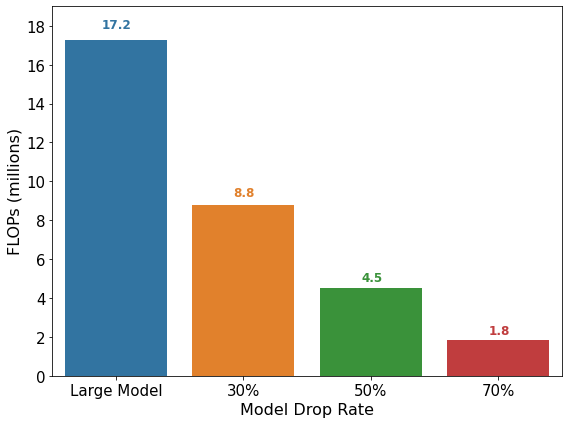

In [405]:
fig, ax = plt.subplots(figsize=fs)
from matplotlib.ticker import MaxNLocator

# ax = plt.figure().gca()


bar_plot = sns.barplot(x="prune_percentage",y="flops",data=combined_frame,capsize=0.1,ci=None)
# bar_plot.set_yscale("log")
bar_plot.set_ylabel('Floating point operations')
bar_plot.set_xlabel('Model Parameters')          
# bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

# bar_plot.set_title('FLOPS against different model rates', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel('FLOPs (millions)', fontsize=font_size)
ax.set_xlabel('Model Drop Rate', fontsize=font_size)
ax.set_ylim(0, 19)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate("{0:.1f}".format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
plt.savefig('flops_by_pruning.png')

In [406]:
def get_data_to_barplot_slow_fast(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_10k = fpath + 'metrics_stat_testbed.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_pruned.csv' # change to None if desired
    
    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    
#     metrics_testbed_10k['prune_percentage'] = 'Slow Device (6.6M)'
#     metrics_testbed_10k['model_params'] = '6.6M'
    
    metrics_testbed_10k['prune_percentage'] = 'Fast Device (Large)'
    metrics_testbed_10k['model_params'] = 'Fast Device (6.6M)'
    
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}% Pruned'
    metrics_testbed_10k_pruned["model_params"] = f'Slow Device (6.6M)'
    
    metrics_testbed_10k['total_train_time'] = (metrics_testbed_10k['total_train_time'].astype('float') / 1000)/60
    metrics_testbed_10k_pruned['total_train_time'] = (metrics_testbed_10k_pruned['total_train_time'].astype('float') / 1000)/60

    '''
    Plot training times for slow device only
    '''
    
    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]
    df_slow_device_10k['prune_percentage'] = 'Slow Device (Large)'
    df_slow_device_10k['device_type'] = "Slow Device"
    df_slow_device_10k_pruned['device_type'] = "Slow Device"
    
    
    
    df_fast_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 0]
    df_fast_device_10k['device_type'] = "Fast Device"
    
    
#     df_fast_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 0]
#     df_fast_device_10k['prune_percentage'] = f"Fast Device"

    panda_frames = []
    
    panda_frames.append(df_slow_device_10k_pruned)
    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []

    panda_frames.append(df_fast_device_10k)
    panda_frames.append(df_slow_device_10k)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

In [407]:
combined_pruned_frame_0, combined_frame_0 = get_data_to_barplot_slow_fast(0, '14-10-2021')
combined_pruned_frame_30, combined_frame_30 = get_data_to_barplot_slow_fast(30, '14-10-2021')
combined_pruned_frame_50, combined_frame_50 = get_data_to_barplot_slow_fast(50, '14-10-2021')
combined_pruned_frame_70, combined_frames_70 = get_data_to_barplot_slow_fast(70, '14-10-2021')

panda_frames_sf = []


panda_frames_sf.append(combined_frame_0)
panda_frames_sf.append(combined_pruned_frame_30)
panda_frames_sf.append(combined_pruned_frame_50)
panda_frames_sf.append(combined_pruned_frame_70)


combined_frame_sf = pd.concat(panda_frames_sf, axis=0, ignore_index=True)

/home/mustansar/Softwares/anaconda/envs/fedlearning/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mustansar/Softwares/anaconda/envs/fedlearning/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mustansar/Softwares/anaconda/envs/fedlearning/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

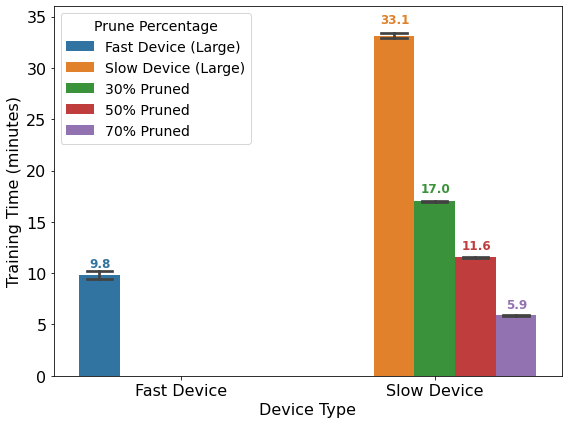

In [349]:
font_size = 16
#     sns.set_style({'font.family': font_family})
fig, ax = plt.subplots(figsize=fs)


# bar_plot = sns.barplot(x="prune_percentage",y="total_train_time",data=combined_frame_sf, hue="prune_percentage",capsize=0.1)
bar_plot = sns.barplot(x="device_type",y="total_train_time",data=combined_frame_sf, hue="prune_percentage",capsize=0.1)
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          

bar_plot.legend(title="Prune Percentage", fontsize=14, title_fontsize = 14)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.set_ylabel('Training Time (minutes)', fontsize=font_size)
ax.set_xlabel('Device Type', fontsize=font_size)

ax.set_ylim(0, 36)
plt.tight_layout()

for index, p in enumerate(bar_plot.patches):
    current_width = p.get_width()
    current_pos = p.get_x()
#     print(p.get_height())
    bar_plot.annotate("{0:.1f}".format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
plt.savefig('bar_plot_slow_fast_by_device_type.jpg')

[-0.37 -0.27]


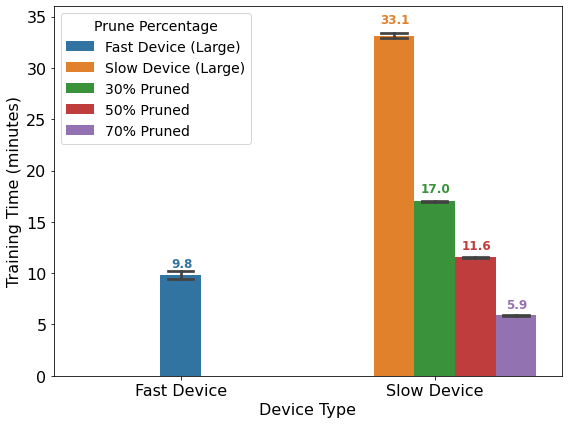

In [408]:
font_size = 16
#     sns.set_style({'font.family': font_family})
fig, ax = plt.subplots(figsize=fs)


# bar_plot = sns.barplot(x="prune_percentage",y="total_train_time",data=combined_frame_sf, hue="prune_percentage",capsize=0.1)
bar_plot = sns.barplot(x="device_type",y="total_train_time",data=combined_frame_sf, hue="prune_percentage",capsize=0.1)
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          

bar_plot.legend(title="Prune Percentage", fontsize=14, title_fontsize = 14, loc="upper left")

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.set_ylabel('Training Time (minutes)', fontsize=font_size)
ax.set_xlabel('Device Type', fontsize=font_size)

ax.set_ylim(0, 36)
plt.tight_layout()

for index, p in enumerate(bar_plot.patches):
    current_width = p.get_width()
    current_pos = p.get_x()
#     print(type(p))
    
    if index == 0:
#         p.set_visible(False)
        p.set_x(current_pos+(current_width*2))
        
        # get also the std mark
#         print("vertical", bar_plot.axes.lines[index].get_xdata())
#         print(p.axes)
#         bottom_line =  [-0.1, -0.003]#[-0.01, -0.5] #bar_plot.axes.lines[index+1].get_xdata()
#         top_line = [1.27, 1.37]# [1.27 1.37] bar_plot.axes.lines[index-1].get_xdata()
#         print(top_line)
        
        
#         bar_plot.axes.lines[index+1].set_xdata(bottom_line)
        bar_plot.axes.lines[index].set_xdata(current_pos+(current_width*2.5))
        print(bar_plot.axes.lines[index+1].get_xdata()) #[-0.37 -0.27]
        bar_plot.axes.lines[index+1].set_xdata([0.05, -0.05])
        bar_plot.axes.lines[2].set_xdata([0.05, -0.05])
        
    bar_plot.annotate("{0:.1f}".format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
    

plt.savefig('bar_plot_slow_fast_by_device_type.png')

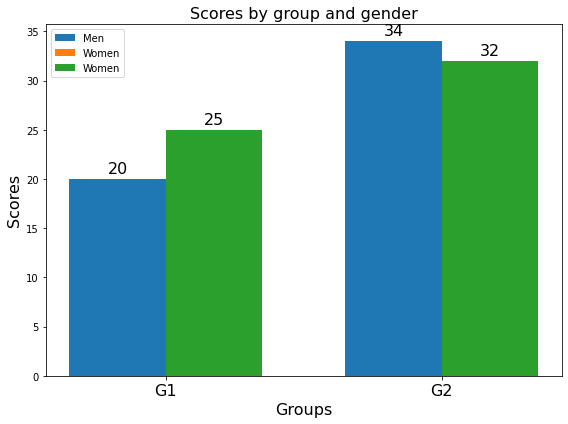

In [161]:

labels = ['G1', 'G2']
men_means = [20, 34]
women_means = [25, 32]
a_means = [25, 32]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
rects3 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', fontsize=16)
ax.set_xlabel('Groups', fontsize=16)
ax.set_title('Scores by group and gender', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend()

ax.bar_label(rects1, padding=3, fontsize=16)
ax.bar_label(rects2, padding=3, fontsize=16)

fig.tight_layout()

# plt.show()
plt.savefig("dummy_fig.jpg")